<a href="https://colab.research.google.com/github/andymacale/progetto_lab/blob/main/progetto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!git clone https://github.com/andymacale/progetto_lab
%cd progetto_lab
!pip install -r requirements.txt

Cloning into 'progetto_lab'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 56 (delta 26), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (56/56), 2.48 MiB | 8.35 MiB/s, done.
Resolving deltas: 100% (26/26), done.
/content/progetto_lab/progetto_lab


In [11]:
# Importazione delle librerie
import rawpy # per caricare le immagini in formato RAW
import imageio # per gestire l'IO delle immagini

In [12]:
from google.colab import files
path = files.upload()

Saving DSC_0005.NEF to DSC_0005.NEF


In [13]:
if path:
    try:
       nome = list(path.keys())[0]
       with rawpy.imread(nome) as raw:
          immagine = raw.postprocess()
    except:
        print('Formato immagine non valido!')

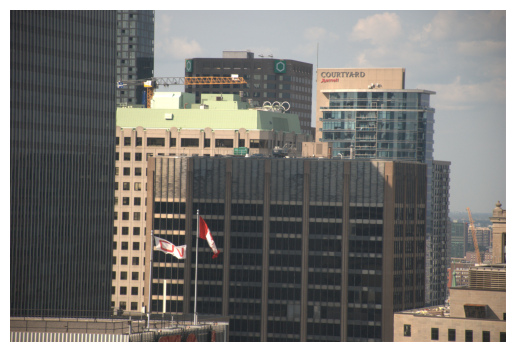

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def stampaImmagine(dati):
  # Per stampare le immagini singole
  plotImmagine = plt.imshow(dati)
  plt.axis('off')
  plt.show()

stampaImmagine(immagine)

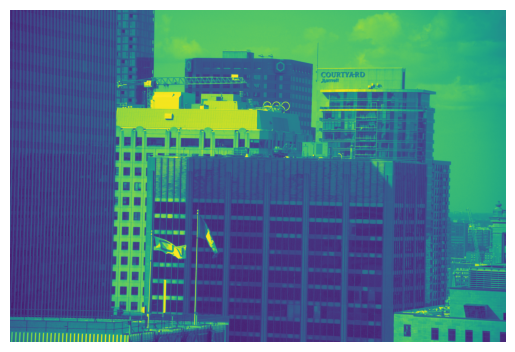

In [15]:
# Conversione dati immagine da RGB a YCbCr
from PIL import Image
import numpy as np

datiRGB = Image.fromarray(immagine)
datiYCbCr = datiRGB.convert('YCbCr')

y, cb, cr = datiYCbCr.split()
stampaImmagine(y)

In [16]:
# Equalizzatore dell'istogramma sulla componente y
import cv2
ascissa, ordinata = np.shape(y)
yArray = np.array(y)
yEqArray = cv2.equalizeHist(yArray) # Istogramma
yEq = Image.fromarray(yEqArray)
datiImmagineEqualizzataYCbCr = Image.merge('YCbCr', (yEq, cb, cr)) # Inserimento della y equalizzata
immagineEqualizzata = datiImmagineEqualizzataYCbCr.convert('RGB')

In [22]:
!python3 genera_dataset.py

Prova


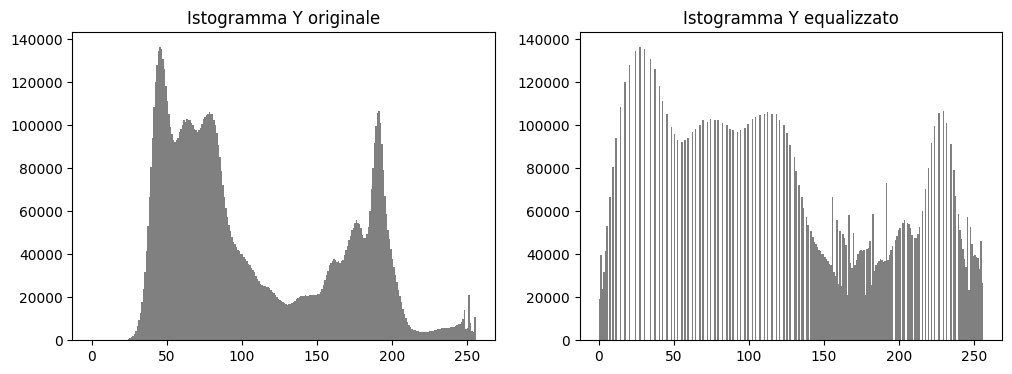

In [18]:
# Confronto tra i due istogrammi
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(yArray.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Istogramma Y originale')

plt.subplot(1, 2, 2)
plt.hist(yEqArray.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Istogramma Y equalizzato')

plt.show()

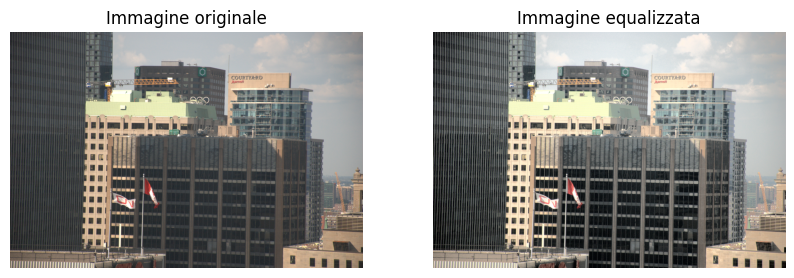

In [19]:
# Confronto tra l'immagine originale e quella equalizzata
figure, assi = plt.subplots(1, 2, figsize=(10, 5))

assi[0].imshow(immagine)
assi[0].set_title('Immagine originale')
assi[0].axis('off')

assi[1].imshow(immagineEqualizzata)
assi[1].set_title('Immagine equalizzata')
assi[1].axis('off')

plt.show()

In [20]:
# Calcolo delle metriche
from skimage.metrics import structural_similarity as ssim
import math

def calcoloMSE(originale, modificata):
  return np.mean((originale - modificata) ** 2)

def calcoloPSNR(originale, modificata):
  mse = calcoloMSE(originale, modificata)
  if mse == 0:
    # Immagini identiche
    return float('-inf')
  # Immagini diverse
  massimo = 255.0
  return 10 * math.log10 ((massimo ** 2)/mse)

def calcoloSSIM(originale, modificata):
  # Converti i dati delle immagini in array
  originaleArray = np.array(originale)
  modificataArray = np.array(modificata)
  # Per gestire le immagini di dimensioni differenti
  multichannel = True if originaleArray.ndim == 3 else False
  return ssim(originaleArray, modificataArray, multichannel=multichannel, win_size=3)


In [ ]:
print('Metriche:\n')
print(f'\tMSE: {calcoloMSE(immagine, immagineEqualizzata):.2f}\n')
print(f'\tPSNR: {calcoloPSNR(immagine, immagineEqualizzata):.2f} dB\n')
print(f'\tSSIM: {calcoloSSIM(immagine, immagineEqualizzata):.4f}\n')


Metriche:

	MSE: 105.36

	PSNR: 27.90 dB

	SSIM: 0.8977

